<a href="https://colab.research.google.com/github/rishabhk1501/Data-Analytics-Tasks/blob/main/session_20_task_soln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

DATA DESCRIPTION
```
file name -> Columns
quater-i.csv -> ['order_id', 'quantity', 'item_id', 'choice_description_id' 'item_price']
items.csv -> ['item_id', 'item_name']
```
Dataset Link - https://drive.google.com/drive/folders/1Z0kaFybvgFeczeUj4dldUnhTdloLqLsL?usp=share_link

In [ ]:
# import like this
items_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTF9e7kKsonqQkT6fCKjdpTMna2nv3UBM0epyP4n4Dj9fMuTAinpztKBiDk_h92zZsGVAKB1e9v0fbC/pub?output=csv"
q1_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRX8QWKpjDAHK33yImTGljs6I3jsDQoR6jgX01aCD_QGi9Yis0glG8jLcIUadhTOLgXuLARroljImL3/pub?output=csv"
q2_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTm0Mhp6NwsLIU2wC0iASabEgfNahUOSQYYBXQnacFUc1z9KRLtJUG696u1_MjnwnlmP_tGVFtai5F9/pub?output=csv"


q1= pd.read_csv(q1_path)
q2 = pd.read_csv(q2_path)


items = pd.read_csv(items_path)

###`Q:1-5`
1. You are given three quater files, your job is to append these three files and make a single dataframe.
2. Have a index as Q-1 Q-2 Q-3 for respective quater files in the dataframe
3. Your are given a file items.csv which has item_id and item_name. Find out most sold items in each quarter.
4. Find out items which has made most revenue in each quarter.
5. Find out avg order price of each quarter.

***Note: item_price is given as str with $ sign, in earlier task you have converted this to rupees, here too first convert item_price field in rupees.***

In [ ]:
orders = pd.concat([q1,q2],keys=['Q1','Q2'])
orders = orders.reset_index()
orders

,level_0,level_1,order_id,quantity,item_id,choice_description_id,item_price
0,Q1,0,1,1,1,1,$3.39
1,Q1,1,1,1,2,2,$3.39
2,Q1,2,2,2,4,3,$16.98
3,Q1,3,4,1,7,6,$9.25
4,Q1,4,6,1,9,8,$8.75
...,...,...,...,...,...,...,...
4617,Q2,2342,1829,1,23,92,$11.25
4618,Q2,2343,1830,1,23,1043,$11.25
4619,Q2,2344,1832,1,10,116,$8.75
4620,Q2,2345,1832,1,8,0,$4.45


In [ ]:
float(orders.loc[0,'item_price'].strip('$'))

3.39

In [ ]:
orders.merge(items,how='inner',on='item_id').groupby('level_0')['item_name'].value_counts().reset_index().drop_duplicates('level_0')

,level_0,item_name,count
0,Q1,Chicken Bowl,351
49,Q2,Chicken Bowl,375


In [ ]:
orders['item_price'] = orders['item_price'].apply(lambda x: float(x.strip('$')))

In [ ]:
orders

,level_0,level_1,order_id,quantity,item_id,choice_description_id,item_price
0,Q1,0,1,1,1,1,3.39
1,Q1,1,1,1,2,2,3.39
2,Q1,2,2,2,4,3,16.98
3,Q1,3,4,1,7,6,9.25
4,Q1,4,6,1,9,8,8.75
...,...,...,...,...,...,...,...
4617,Q2,2342,1829,1,23,92,11.25
4618,Q2,2343,1830,1,23,1043,11.25
4619,Q2,2344,1832,1,10,116,8.75
4620,Q2,2345,1832,1,8,0,4.45


In [ ]:
orders.merge(items,how='inner',on='item_id').groupby(['level_0','item_name'])['item_price'].sum().reset_index().sort_values('item_price',ascending=False).drop_duplicates('level_0')

,level_0,item_name,item_price
65,Q2,Chicken Bowl,3817.01
17,Q1,Chicken Bowl,3525.72


In [ ]:
orders.merge(items,how='inner',on='item_id').groupby('level_0')['item_price'].mean()

level_0
Q1    7.577138
Q2    7.354994
Name: item_price, dtype: float64

###`Q-6` From the IPL wala dataset you have to find the Purple cap holder each season.

*Note: Bowler with most no wickets in a season gets purple cap. If more than one bowler have same no of wickets in the season, one with least ecomnomy among them is purple cap holder.*

Bowler's Economy = runs-conceded per six balls

In [ ]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [ ]:
delivery = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQyFbSU3rSpoWrrCB-CpRPe71dPx0tTp1Glm6H75gJNJVBl44TtGSDjFI7jO4w9Vj8sDv3GqxHEVl5S/pub?output=csv')
matches = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSHcfegJdOCzOS-1TTTZzJbGs9pe7HyZ1ZnVdV6yprgjQ1XSC-Gjdw5KopcBuu_QjgDLgOyvtp12sO4/pub?output=csv')

In [ ]:
delivery.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [ ]:
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [ ]:
ipl = matches.merge(delivery,how='inner',on='ID')
ipl.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [ ]:
economy = ipl.groupby(['Season','bowler'])

In [ ]:
eco = (round(((economy['total_run'].sum()) * 6)/(economy['total_run'].size()),2)).reset_index()

In [ ]:
eco

,Season,bowler,total_run
0,2007/08,A Kumble,7.98
1,2007/08,A Mishra,6.83
2,2007/08,A Nehra,7.65
3,2007/08,A Nel,10.33
4,2007/08,A Symonds,14.45
...,...,...,...
1668,2022,VR Iyer,11.50
1669,2022,Washington Sundar,8.44
1670,2022,YBK Jaiswal,36.00
1671,2022,YS Chahal,7.50


In [ ]:
eco.rename(columns={'total_run':'economy_rate'},inplace=True)

In [ ]:
eco

,Season,bowler,economy_rate
0,2007/08,A Kumble,7.98
1,2007/08,A Mishra,6.83
2,2007/08,A Nehra,7.65
3,2007/08,A Nel,10.33
4,2007/08,A Symonds,14.45
...,...,...,...
1668,2022,VR Iyer,11.50
1669,2022,Washington Sundar,8.44
1670,2022,YBK Jaiswal,36.00
1671,2022,YS Chahal,7.50


In [ ]:
ipl['kind'].unique()

array([nan, 'caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
       'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

In [ ]:
wicket_df = ipl[(ipl['isWicketDelivery'] == 1) & (ipl['kind'].isin(['caught','caught and bowled','bowled', 'stumped','lbw', 'hit wicket']))]

In [ ]:
wicket = wicket_df.groupby(['Season','bowler'])

In [ ]:
wick = wicket['isWicketDelivery'].sum().reset_index().rename(columns={'isWicketDelivery':'total_wickets'})
wick

,Season,bowler,total_wickets
0,2007/08,A Kumble,7
1,2007/08,A Mishra,11
2,2007/08,A Nehra,12
3,2007/08,A Nel,1
4,2007/08,AA Noffke,1
...,...,...,...
1375,2022,VG Arora,3
1376,2022,VR Aaron,2
1377,2022,Washington Sundar,6
1378,2022,YS Chahal,27


In [ ]:
final = wick.merge(eco,how='inner',on=['Season','bowler']).sort_values(['total_wickets','economy_rate'],ascending=[False,True]).drop_duplicates('Season')

In [ ]:
final = final.sort_values('Season').rename(columns={'bowler':'Purple Cap Holder'}).drop(columns=['total_wickets','economy_rate']).set_index('Season')

In [ ]:
final

,Purple Cap Holder
Season,
2007/08,Sohail Tanvir
2009,RP Singh
2009/10,PP Ojha
2011,SL Malinga
2012,M Morkel
...,...
2018,AJ Tye
2019,Imran Tahir
2020/21,K Rabada


###`Q-7:` Best bowler in death overs.
*Note: Have taken most no of wickets in case of tie with least economy*

Death Overs - [16-20]

In [ ]:
# code here

In [ ]:
df = ipl[ipl['overs'] > 15]

In [ ]:
economy = df.groupby('bowler')

In [ ]:
economy.size()

bowler
A Ashish Reddy     75
A Chandila          6
A Choudhary        27
A Flintoff         18
A Kumble          112
                 ... 
YK Pathan          30
YS Chahal         242
Yash Dayal         61
Yuvraj Singh       67
Z Khan            547
Length: 373, dtype: int64

In [ ]:
eco = round((economy['total_run'].sum() * 6)/(economy['total_run'].size()),2).reset_index().rename(columns={'total_run':'economy_rate'})
eco

,bowler,economy_rate
0,A Ashish Reddy,9.84
1,A Chandila,6.00
2,A Choudhary,8.89
3,A Flintoff,17.33
4,A Kumble,7.93
...,...,...
368,YK Pathan,12.20
369,YS Chahal,9.79
370,Yash Dayal,7.87
371,Yuvraj Singh,8.69


In [ ]:
wicket_df = df[(df['isWicketDelivery'] == 1) & (df['kind'].isin(['caught','caught and bowled','bowled', 'stumped','lbw', 'hit wicket']))]

In [ ]:
wicket = wicket_df.groupby('bowler')

In [ ]:
wick = wicket['isWicketDelivery'].sum().reset_index().rename(columns={'isWicketDelivery':'total_dismissals'})
wick

,bowler,total_dismissals
0,A Ashish Reddy,8
1,A Choudhary,1
2,A Flintoff,1
3,A Kumble,14
4,A Mishra,25
...,...,...
289,YK Pathan,3
290,YS Chahal,20
291,Yash Dayal,3
292,Yuvraj Singh,6


In [ ]:
final = wick.merge(eco,how='inner',on='bowler').sort_values(['total_dismissals','economy_rate'],ascending=[False,True]).head(1)
final

,bowler,total_dismissals,economy_rate
64,DJ Bravo,102,9.37


###`Q-8` Batsman record season wise

Make a function which takes a input `batsman_name` and it returns a dataframe.
Columns of the data frame are - `['Season','Innings', 'TotalRuns', 'Avg', 'HighestScore','StrikeRate']`.
* In result make `Season` column as index.

* Avg - total_runs/ no of time got out. - player_out column will help.
* StrikeRate -(total_runs/ balls faced) * 100- wides are not included in batsman ball faced counts. No balls are included. -> Extra_type column will help
* Batsman Can score runs on No Balls.
* Batsman can get out on No Ball or Wides. And even while being on non-striker. Keep these things in mind before masking.

In [ ]:
ipl.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [ ]:
ipl['Season'].unique()

array(['2022', '2021', '2020/21', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011', '2009/10', '2009', '2007/08'],
      dtype=object)

In [ ]:
def batsman_record(name):

  batter_df = ipl[ipl['batter'] == name]
  season = batter_df.groupby('Season')

  l = []

  for group,data in season:
    list_column = ['Innings', 'TotalRuns', 'Avg', 'HighestScore', 'StrikeRate']
    df = pd.DataFrame(index=[group], columns = list_column)
    df['Innings'] = data['ID'].nunique()
    df['TotalRuns'] = data['batsman_run'].sum()
    df['Avg'] = round((data['batsman_run'].sum()) / (len(data[data['player_out'] == name])),2)
    df['HighestScore'] = data.groupby('ID')['batsman_run'].sum().sort_values(ascending=False).values[0]
    df['StrikeRate'] = round((((data['batsman_run'].sum())/(len(data) - (len(data[data['extra_type'] == 'wides'])))) * 100),2)
    l.append(df)

  final = pd.concat(l)

  return final



In [ ]:
batsman_record('V Kohli')

,Innings,TotalRuns,Avg,HighestScore,StrikeRate
2007/08,12,165,15.00,38,105.10
2009,13,246,22.36,50,112.33
2009/10,13,307,27.91,58,144.81
2011,16,557,46.42,71,121.09
2012,15,364,30.33,73,111.66
...,...,...,...,...,...
2018,14,530,48.18,92,139.11
2019,14,464,33.14,100,141.46
2020/21,15,471,42.82,90,122.02
2021,15,405,28.93,72,119.47


In [ ]:
batsman_record('RG Sharma')

,Innings,TotalRuns,Avg,HighestScore,StrikeRate
2007/08,12,404,36.73,76,147.99
2009,16,362,27.85,52,114.92
2009/10,16,404,28.86,73,133.77
2011,13,372,37.20,87,125.25
2012,16,433,30.93,109,126.61
...,...,...,...,...,...
2018,14,286,23.83,94,133.02
2019,15,405,28.93,67,128.57
2020/21,12,334,27.83,80,127.00
2021,13,381,31.75,63,127.42


###`Q-9` Using both dataset, make a dataframe as described below

Data Frame columns-> `['PlayerOfThematch', 'BattingFigure', 'BowlingFigure']`

* BattingFigure->`<runs>/<balls>`
* BowlingFigure->`<wicket>/<runs-conceded>`

DataFrame should have one record for each match.

Say 'V Kohli' got POM award then in dataset include his batting figure of that match. Say he scored 112runs in 76 balls. And he hasn't bowled so Bowling Figure will be NaN
```
PlayerOfThematch BattingFigure BowlingFigure
V Kohli          112/76         nan  

```


In [ ]:
ipl.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [ ]:
ipl['kind'].unique()

array([nan, 'caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
       'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

In [ ]:
matches = ipl.groupby('ID')

l = []
for group,data in matches:

  df = pd.DataFrame(index=[group], columns=['Player of the Match', 'Batting figure', 'Bowling figure'])

  df['Player of the Match'] = data['Player_of_Match'].values[0]
  batter_df = data[data['batter'] == data['Player_of_Match'].values[0]]
  bowler_df = data[data['bowler'] == data['Player_of_Match'].values[0]]
  runs_scored = batter_df['batsman_run'].sum()
  balls_faced = len(batter_df) - (len(batter_df[batter_df['extra_type'] == 'wides']))
  df['Batting figure'] = str(runs_scored) + '/' + str(balls_faced)
  wickets = len(bowler_df[(bowler_df['isWicketDelivery'] == 1) & (bowler_df['kind'].isin(['caught','caught and bowled','bowled','stumped','lbw','hit wicket']))])
  runs_conceded = bowler_df['total_run'].sum()
  df['Bowling figure'] = str(wickets) + '/' + str(runs_conceded)

  l.append(df)

final = pd.concat(l)

final['Batting figure'] = final['Batting figure'].apply(lambda x: np.nan if x == '0/0' else x)
final['Bowling figure'] = final['Bowling figure'].apply(lambda x: np.nan if x == '0/0' else x)

In [ ]:
final

,Player of the Match,Batting figure,Bowling figure
335982,BB McCullum,158/73,NaN
335983,MEK Hussey,116/54,NaN
335984,MF Maharoof,NaN,2/14
335985,MV Boucher,39/19,NaN
335986,DJ Hussey,38/43,1/35
...,...,...,...
1304116,Harpreet Brar,NaN,3/26
1312197,DA Miller,68/38,NaN
1312198,RM Patidar,112/54,NaN
1312199,JC Buttler,106/60,NaN


In [ ]:
final[final['Player of the Match'] == 'SR Tendulkar']

,Player of the Match,Batting figure,Bowling figure
392181,SR Tendulkar,59/49,NaN
392197,SR Tendulkar,68/45,0/11
419114,SR Tendulkar,63/32,NaN
419122,SR Tendulkar,71/48,NaN
419125,SR Tendulkar,72/52,NaN
419150,SR Tendulkar,89/59,NaN
501205,SR Tendulkar,55/46,NaN
598050,SR Tendulkar,48/28,NaN


## **Questions Based on Iris Dataset**

- **Sepal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **SepalLengthCm:** Sepal length of flowers in cm
    - **SepalWidthCm:** Sepal width of flowers in cm

- **Petal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **PetalLengthCm:** Petal length of flowers in cm
    - **PetalWidthCm:** Petal width of flowers in cm

- **Iris Virginica:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Versicolor:** https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Setosa:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv
    - **Unnamed 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

In [2]:
import pandas as pd
sepal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv")
petal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv")

virginica = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv")
versicolor = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv")
setosa = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv")


In [3]:
sepal_all.drop(columns='Unnamed: 0',inplace=True)

In [4]:
petal_all.drop(columns='Unnamed: 0',inplace=True)

In [5]:
virginica.drop(columns='Unnamed: 0',inplace=True)

In [6]:
versicolor.drop(columns='Unnamed: 0',inplace=True)

In [7]:
setosa.drop(columns='Unnamed: 0',inplace=True)

In [8]:
petal_all

,Id,PetalLengthCm,PetalWidthCm
0,1,1.4,0.2
1,2,1.4,0.2
2,3,1.3,0.2
3,4,1.5,0.2
4,5,1.4,0.2
...,...,...,...
145,146,5.2,2.3
146,147,5.0,1.9
147,148,5.2,2.0
148,149,5.4,2.3


In [9]:
virginica

,Id,Species
0,101,Iris-virginica
1,102,Iris-virginica
2,103,Iris-virginica
3,104,Iris-virginica
4,105,Iris-virginica
5,106,Iris-virginica
6,107,Iris-virginica
7,108,Iris-virginica
8,109,Iris-virginica
9,110,Iris-virginica


### `Q-9:` Plot a bar chart of the average Sepal Length  of Virginica and average Petal length of Setosa flower.

In [10]:
round(virginica.merge(sepal_all,how='inner',on='Id')['SepalLengthCm'].mean(),2)

6.59

In [11]:
round(setosa.merge(petal_all,how='inner',on='Id')['PetalLengthCm'].mean(),2)

1.46

<Axes: >

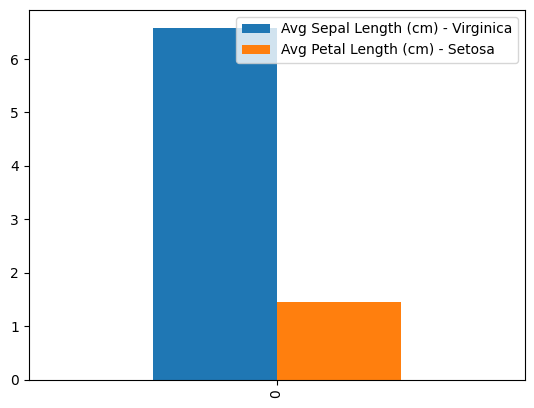

In [12]:
df = pd.DataFrame(index=[0], columns=['Avg Sepal Length (cm) - Virginica', 'Avg Petal Length (cm) - Setosa'])
df['Avg Sepal Length (cm) - Virginica'] = round(virginica.merge(sepal_all,how='inner',on='Id')['SepalLengthCm'].mean(),2)
df['Avg Petal Length (cm) - Setosa'] = round(setosa.merge(petal_all,how='inner',on='Id')['PetalLengthCm'].mean(),2)

df.plot(kind='bar')

### `Q-10:` Create the complete dataset by uisng the below datasets:
- virginica
- versicolor
- setosa
- sepal all
- petal all

This dataset should have these below column names in order:
1. Id
2. Species
3. SepalLengthCm
4. SepalWidthCm
5. PetalLengthCm
6. PetalWidthCm

Also, the dataset should be shuffled means the `Id` column should not be in increasing or decreasing order. So, make a dataset which has the shuffled Id column. You can use `DataFrame.sample()` method to shuffle.

In [22]:
virginica.head(3)

,Id,Species
0,101,Iris-virginica
1,102,Iris-virginica
2,103,Iris-virginica


In [23]:
versicolor.head(3)

,Id,Species
0,51,Iris-versicolor
1,52,Iris-versicolor
2,53,Iris-versicolor


In [24]:
setosa.head(3)

,Id,Species
0,1,Iris-setosa
1,2,Iris-setosa
2,3,Iris-setosa


In [25]:
sepal_all.head(3)

,Id,SepalLengthCm,SepalWidthCm
0,1,5.1,3.5
1,2,4.9,3.0
2,3,4.7,3.2


In [26]:
petal_all.head(3)

,Id,PetalLengthCm,PetalWidthCm
0,1,1.4,0.2
1,2,1.4,0.2
2,3,1.3,0.2


In [38]:
setosa_all = setosa.merge(sepal_all,how='inner',on='Id').merge(petal_all,how='inner',on='Id')
setosa_all.head(3)

,Id,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,Iris-setosa,5.1,3.5,1.4,0.2
1,2,Iris-setosa,4.9,3.0,1.4,0.2
2,3,Iris-setosa,4.7,3.2,1.3,0.2


In [39]:
versicolor_all = versicolor.merge(sepal_all,how='inner',on='Id').merge(petal_all,how='inner',on='Id')
versicolor_all.head(3)

,Id,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,51,Iris-versicolor,7.0,3.2,4.7,1.4
1,52,Iris-versicolor,6.4,3.2,4.5,1.5
2,53,Iris-versicolor,6.9,3.1,4.9,1.5


In [40]:
virginica_all = virginica.merge(sepal_all,how='inner',on='Id').merge(petal_all,how='inner',on='Id')
virginica_all.head(3)

,Id,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,101,Iris-virginica,6.3,3.3,6.0,2.5
1,102,Iris-virginica,5.8,2.7,5.1,1.9
2,103,Iris-virginica,7.1,3.0,5.9,2.1


In [52]:
final = pd.concat([setosa_all,versicolor_all,virginica_all]).set_index('Id')
final

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,,
1,Iris-setosa,5.1,3.5,1.4,0.2
2,Iris-setosa,4.9,3.0,1.4,0.2
3,Iris-setosa,4.7,3.2,1.3,0.2
4,Iris-setosa,4.6,3.1,1.5,0.2
5,Iris-setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...
146,Iris-virginica,6.7,3.0,5.2,2.3
147,Iris-virginica,6.3,2.5,5.0,1.9
148,Iris-virginica,6.5,3.0,5.2,2.0


### `Q-11:` Find out the maximum and minimum sepal width and petal width of Setosa and Versicolor. To do this:
- First create a dataset with merging the required datasets
- After that, use `groupby` to create groups based on the "Species" column.
- Then find out which are asked in this question.


The output should be like this:
```bash
Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4

**************************************************

Minimum Sepal width of Versicolor is 2.0
Maximum Sepal width of Versicolor is 3.4

**************************************************
```

In [56]:
species = final.groupby('Species')
min_sepal = species['SepalWidthCm'].min()
max_sepal = species['SepalWidthCm'].max()

min_petal = species['PetalWidthCm'].min()
max_petal = species['PetalWidthCm'].max()

In [64]:
print('*'*50)
print()
print()
print('Minimum Sepal width of Setosa is {}'.format(min_sepal.loc['Iris-setosa']))
print('Maximum Sepal width of Setosa is {}'.format(max_sepal.loc['Iris-setosa']))
print()
print()
print('Minimum Petal width of Setosa is {}'.format(min_petal.loc['Iris-setosa']))
print('Maximum Petal width of Setosa is {}'.format(max_petal.loc['Iris-setosa']))
print()
print()
print('*'*50)
print()
print()
print('Minimum Sepal width of Versicolor is {}'.format(min_sepal.loc['Iris-versicolor']))
print('Maximum Sepal width of Versicolor is {}'.format(max_sepal.loc['Iris-versicolor']))
print()
print()
print('Minimum Petal width of Versicolor is {}'.format(min_petal.loc['Iris-versicolor']))
print('Maximum Petal width of Versicolor is {}'.format(max_petal.loc['Iris-versicolor']))
print()
print()
print('*'*50)
print()
print()

**************************************************


Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4


Minimum Petal width of Setosa is 0.1
Maximum Petal width of Setosa is 0.6


**************************************************


Minimum Sepal width of Versicolor is 2.0
Maximum Sepal width of Versicolor is 3.4


Minimum Petal width of Versicolor is 1.0
Maximum Petal width of Versicolor is 1.8


**************************************************


